# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [75]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sqlite_db = "C:/Users/Pat.NOAGALLERY/Documents/data_sources/adult.sqlite"
conn = sqlite3.connect(sqlite_db)
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE TYPE ='table'", con=conn)
tables

,name
0,SELECT * FROM adult;
1,adult


In [76]:
adult_data = pd.read_sql('select * from adult', con=conn)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [77]:
#less than 10% of the rows are missing data so we are dropping them from our dataframe
adult_data.dropna(inplace=True)
adult_data.shape

(45222, 15)

## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [78]:
adult_data['target'] = adult_data['salary'] == '>50K'
adult_data[['salary','target']].head(10)

,salary,target
0,<=50K,False
1,<=50K,False
2,<=50K,False
3,<=50K,False
4,<=50K,False
5,<=50K,False
6,<=50K,False
7,>50K,True
8,>50K,True
9,>50K,True


### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

In [79]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 16 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education-num     45222 non-null int64
marital-status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null object
salary            45222 non-null object
target            45222 non-null bool
dtypes: bool(1), int64(6), object(9)
memory usage: 5.6+ MB


> There are mixed catagorigal and numeric data
  
>  Numerical Data
>  * Age
>  * fnlwgt
>  * education-num
>  * capital-gain
>  * capital-loss
>  * hours-per-week

> All the rest are categorical


### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

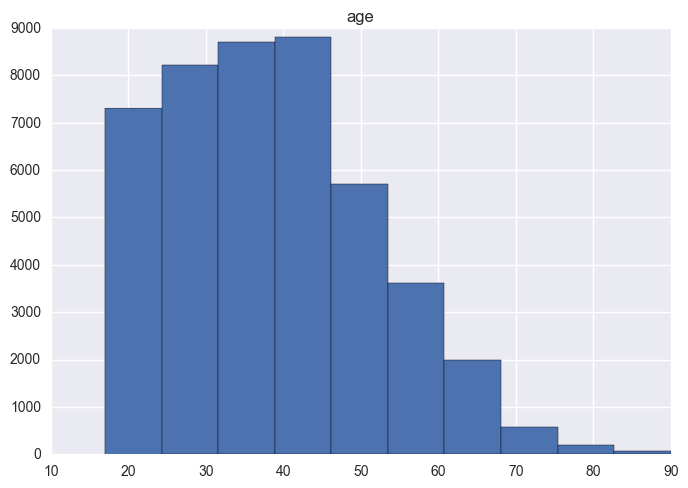

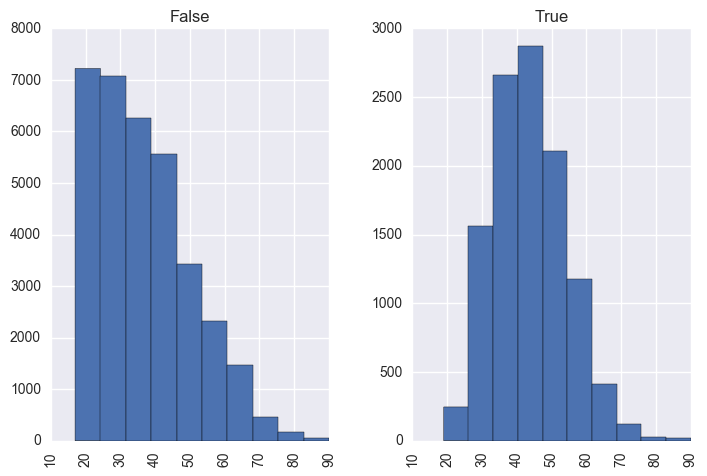

In [80]:
adult_data[['age']].hist()

adult_data.hist(column= "age", by="target")
plt.show()

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

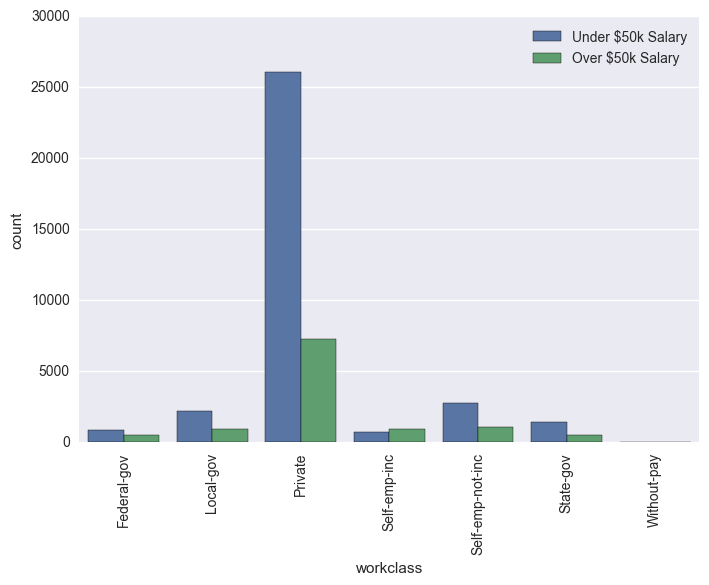

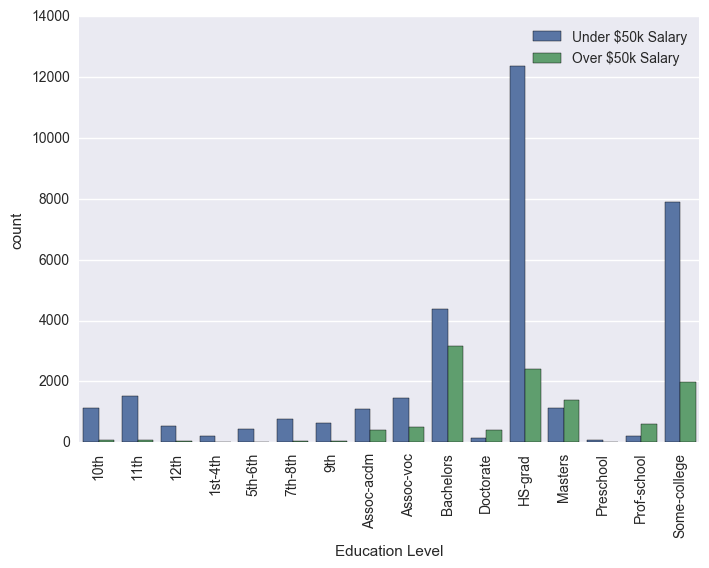

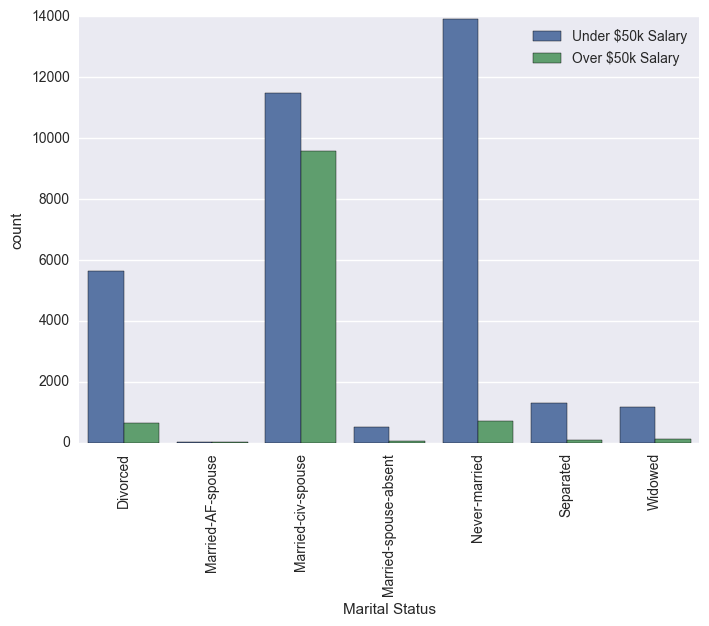

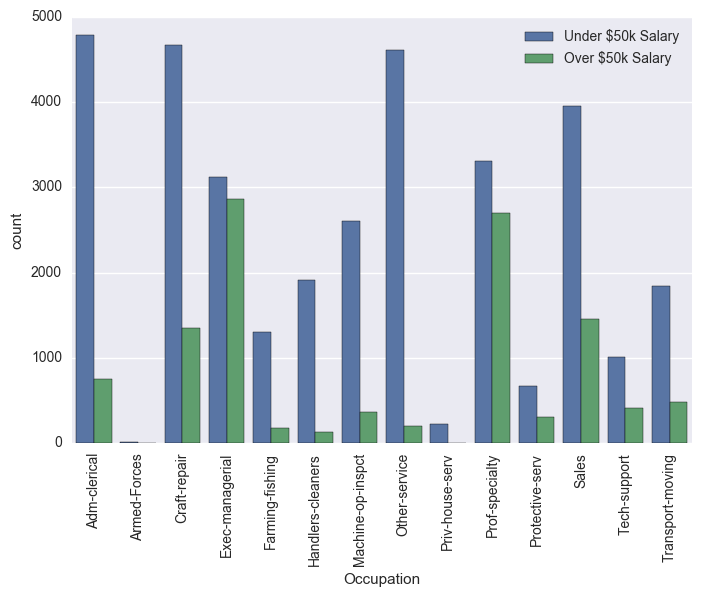

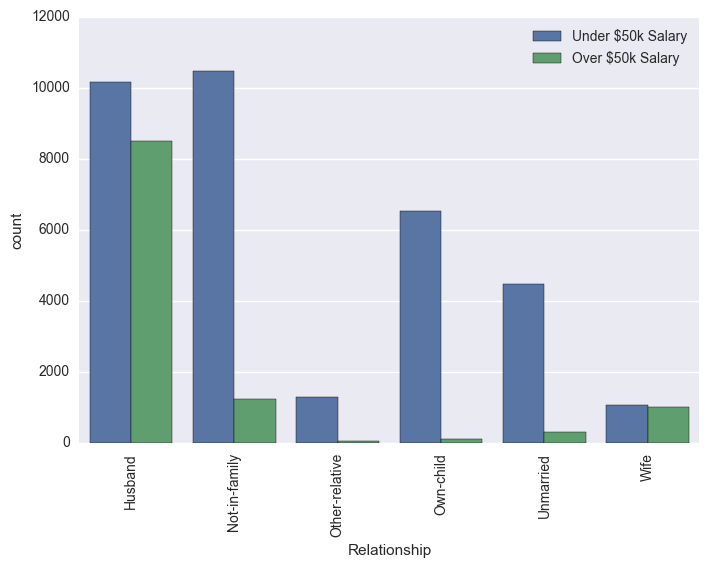

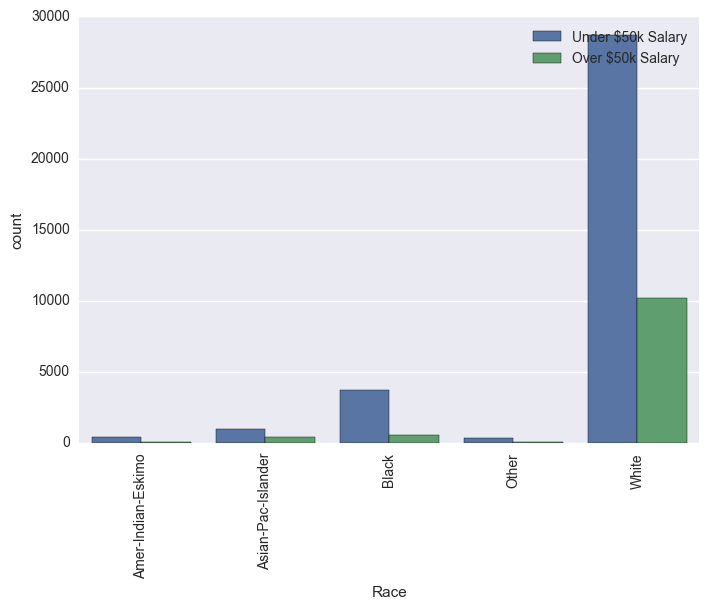

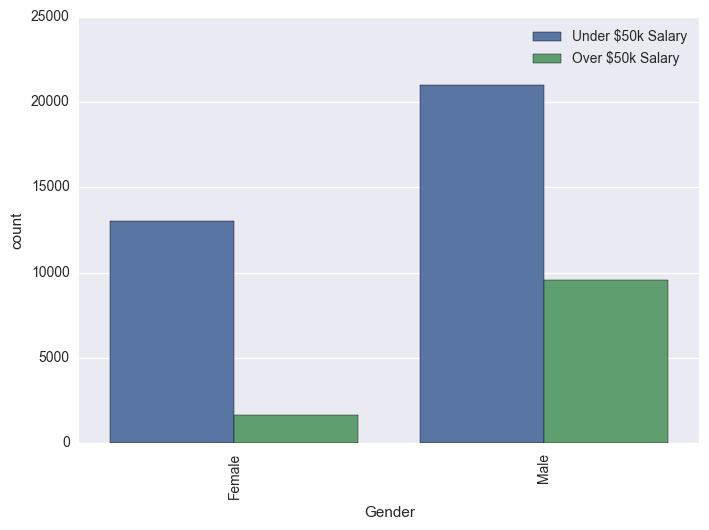

In [81]:
for column in adult_data.columns:
    if adult_data[column].dtypes == 'object':
            adult_data[column] = adult_data[column].astype("category")
#workclass
sns.countplot(x="workclass", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xticks(rotation=90)
plt.show()
#education
sns.countplot(x="education", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xlabel('Education Level')
plt.xticks(rotation=90)
plt.show()
#marital-status
sns.countplot(x="marital-status", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xlabel('Marital Status')
plt.xticks(rotation=90)
plt.show()
#occupation
sns.countplot(x="occupation", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.show()
#relationship
sns.countplot(x="relationship", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xlabel('Relationship')
plt.xticks(rotation=90)
plt.show()
#race
sns.countplot(x="race", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.show()
#sex
sns.countplot(x="sex", hue='target', data=adult_data)
plt.legend(("Under $50k Salary", "Over $50k Salary"))
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.show()


### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)


In [87]:
adult_data_with_dummies = pd.get_dummies(adult_data)


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

In [114]:
from sklearn import preprocessing
for column in adult_data_with_dummies.columns:
    if adult_data_with_dummies[column].dtypes == 'int64' :
        adult_data_with_dummies[column] = preprocessing.scale(adult_data_with_dummies[column])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input

## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

In [139]:
X = adult_data_with_dummies.drop(labels=['fnlwgt','target', 'salary_<=50K', 'salary_>50K'], axis=1)
y = adult_data_with_dummies['target']
print("If we guess every person made less than or equal to $50K, we achieve {}% accuracy.".format(round(100*(1-y.sum()) / y.shape[0] ),1))

If we guess every person made less than or equal to $50K, we achieve -25.0% accuracy.


## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [140]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [ ]:
accuracy_score(y_true, y_pred)

accuracy_score(y_true, y_pred, normalize=False)